In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [16]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


In [17]:
circ['class'].value_counts()

class
0.0    250
1.0    250
Name: count, dtype: int64

<Axes: xlabel='X', ylabel='Y'>

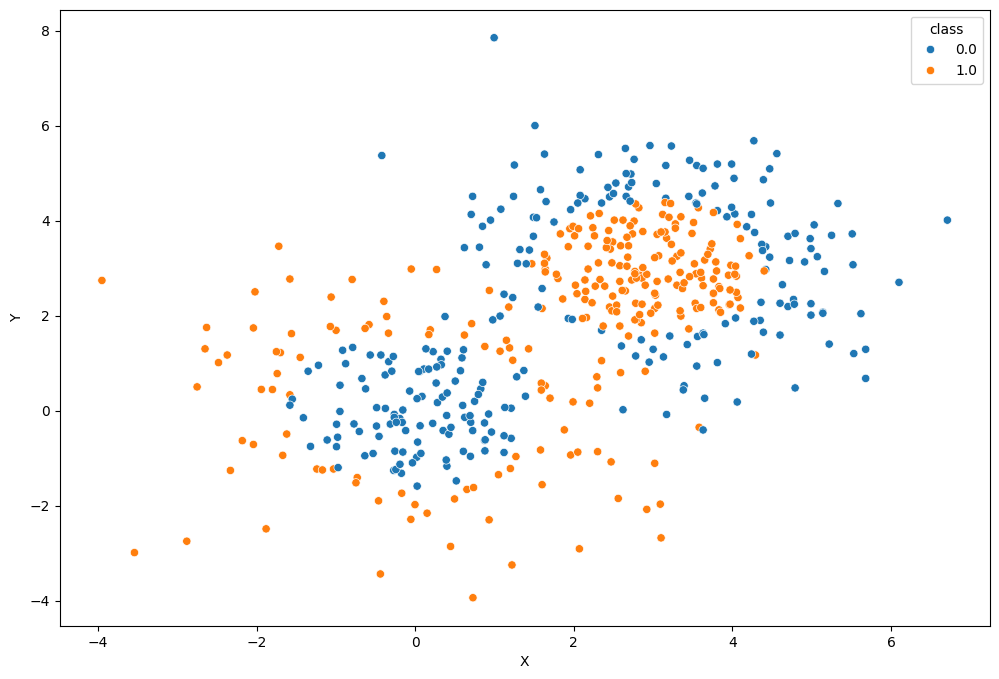

In [18]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class'])

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = circ.drop('class', axis=1)
y = circ['class']

pipe_lr = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [20]:
pipe_lr.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [21]:
pipe_lr.score(X, y)

0.424

In [22]:
coef_lr = pipe_lr.named_steps['lr'].coef_
intercept_lr = pipe_lr.named_steps['lr'].intercept_

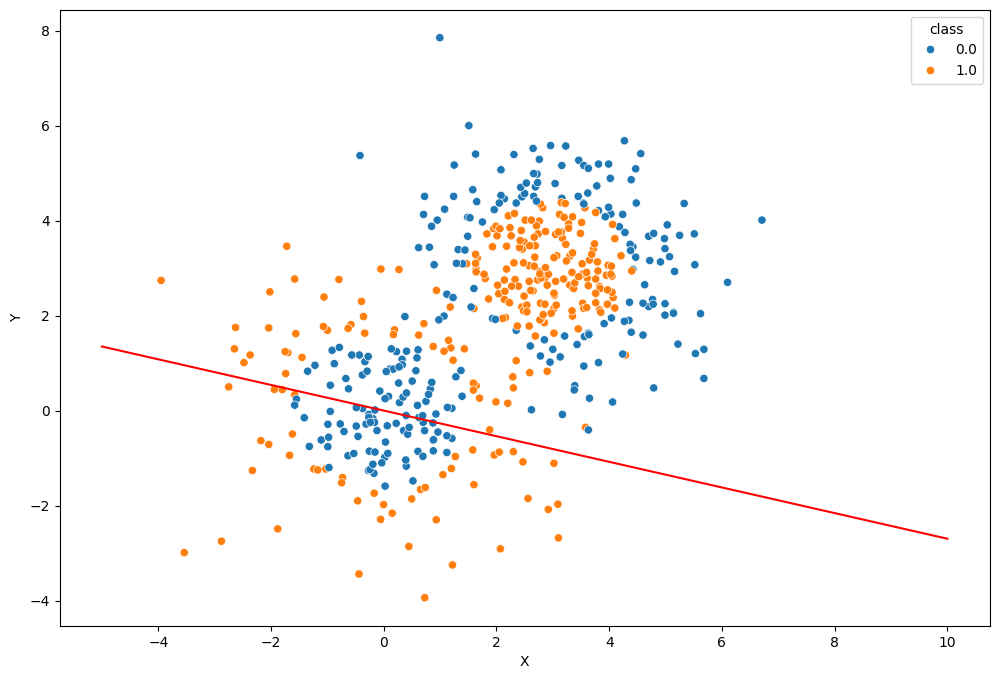

In [23]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class'])
x = np.linspace(-5, 10, 100)
plt.plot(x, -(x * coef_lr[0][0] + intercept_lr[0]) / coef_lr[0][1], color='red')

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [24]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

knn = {}

for k in all_k:
    pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k))])
    pipe_knn.fit(X_train, y_train)
    knn[k] = pipe_knn

In [27]:

for k, model in knn.items():
    print(f'K={k}, Train Accuracy: {model.score(X_train, y_train)}, Test Accuracy: {model.score(X_test, y_test)}') 

K=1, Train Accuracy: 1.0, Test Accuracy: 0.89
K=3, Train Accuracy: 0.9475, Test Accuracy: 0.87
K=10, Train Accuracy: 0.915, Test Accuracy: 0.85
K=30, Train Accuracy: 0.8575, Test Accuracy: 0.74
K=40, Train Accuracy: 0.8, Test Accuracy: 0.75
K=60, Train Accuracy: 0.6925, Test Accuracy: 0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [28]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
### Your code is here




1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [29]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

test_fold = [0 if x in X_train.index else -1 for x in X.index]

ps = PredefinedSplit(test_fold)

pipe_knn_normalized = Pipeline([('scaler', StandardScaler()), 
                                ('knn', KNeighborsClassifier())])

param_grid = {'knn__n_neighbors': [1, 5, 10]}

grid_knn_normalized = GridSearchCV(pipe_knn_normalized, param_grid, cv=ps)

grid_knn_normalized.fit(X, y)

NameError: name 'X' is not defined

In [32]:
grid_knn_normalized.best_params_

{'knn__n_neighbors': 10}

In [33]:
grid_knn_normalized.best_score_

0.6571694405149578

In [34]:
pipe_knn_non_normalized = Pipeline([('knn', KNeighborsClassifier())])

param_grid = {'knn__n_neighbors': [1, 5, 10]}

grid_knn_non_normalized = GridSearchCV(pipe_knn_non_normalized, param_grid, cv=ps)

grid_knn_non_normalized.fit(X, y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0,  0, ...,  0, -1])),
             estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 5, 10]})

In [35]:
grid_knn_non_normalized.best_params_

{'knn__n_neighbors': 10}

In [36]:
grid_knn_non_normalized.best_score_

0.4472367534107416

**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [37]:
pipe_knn = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier())])

params = {'knn__n_neighbors': 10, 'knn__p' : 1}

pipe_knn.set_params(**params)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10, p=1))])

In [38]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10, p=1))])

In [39]:
pipe_knn.score(X_test, y_test)

0.6611476094634109

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='longitude', ylabel='latitude'>

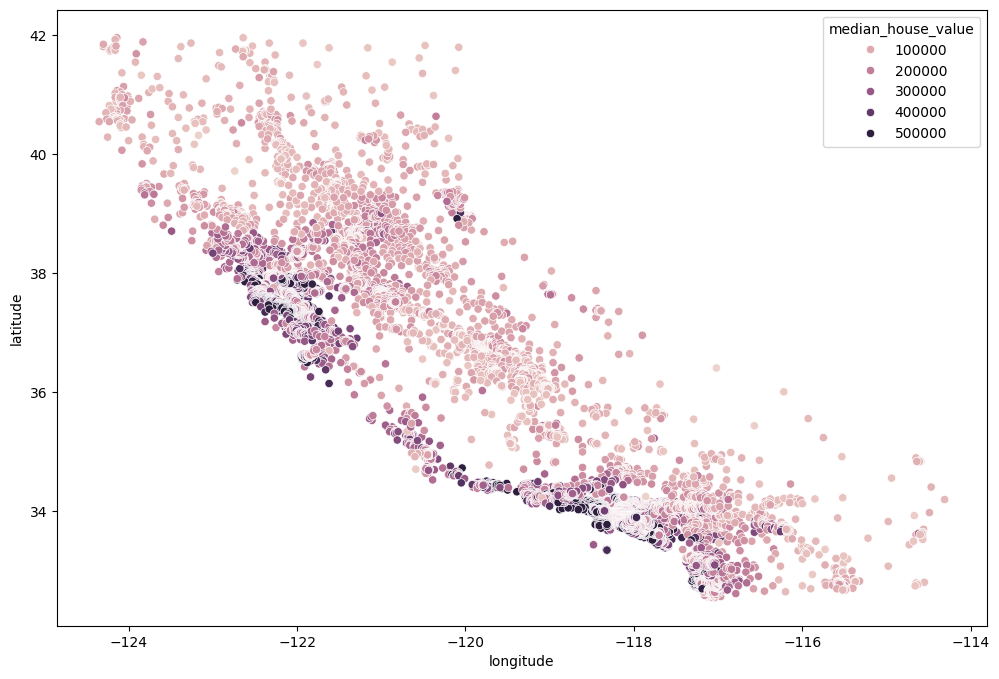

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot(x='longitude', y='latitude', data=X, hue=y)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

pipe_lr = Pipeline([('lr', LinearRegression())])

In [7]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('lr', LinearRegression())])

In [8]:
print(f"RMSE: {mean_squared_error(y_test, pipe_lr.predict(X_test), squared=False)}")

RMSE: 98369.87709657702


In [9]:
pipe_knn = Pipeline([('scaler', StandardScaler()),
                    ('knn', KNeighborsRegressor())])

params = {'knn__n_neighbors': list(range(1, 10))}

In [10]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe_knn, params)

grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [11]:
grid.best_params_

{'knn__n_neighbors': 7}

In [20]:
preds_test = {}

for h in np.arange(0.01, 0.1, 0.01):
    
    def kernel(distances, h=h):
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
        return const * np.exp(power)
    
    knn = KNeighborsRegressor(n_neighbors=grid.best_params_['knn__n_neighbors'], weights=kernel)
    knn.fit(X_train, y_train)
    preds_test[h] = knn.predict(X_test)

In [22]:
preds_test = pd.DataFrame(preds_test)

In [29]:
preds_test[0.01] = preds_test[0.01].fillna(preds_test[0.01].mean())

In [31]:
rmse = {}

for h in preds_test.columns:
    rmse[h] = mean_squared_error(y_test, preds_test[h], squared=False)
    

In [32]:
rmse

{0.01: 52375.76095063763,
 0.02: 52107.73490146309,
 0.03: 52136.87656403071,
 0.04: 52111.04313128604,
 0.05: 52097.64938489849,
 0.060000000000000005: 52109.605083210954,
 0.06999999999999999: 52129.79562252939,
 0.08: 52149.091216301465,
 0.09: 52164.85356531054}